##### Data downloaded from GEO: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE134544

In [1]:
### Import libraries
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re
import warnings

from scipy.stats import zscore
import seaborn as sns
sns.set_style("ticks")

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble._forest import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import scipy.stats as stats
from scipy.stats import kde
import matplotlib as mpl
import statsmodels
from sklearn import metrics
from statsmodels.stats.multitest import multipletests
import warnings

warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('GSE134544_series_matrix.txt', sep='\t', comment='!', low_memory=False).set_index(['ID_REF'])
df.columns = ["X2W-1","X2W0","X2W6","X2W14","X2W26","X5W0","X5W6","X5W14","X6W0",
              "X6W6","X6W14","X6W26","X7W0","X7W6","X7W14","X7W26","X9W0","X9W6",
              "X9W14","X9W26","X10W0","X10W6","X10W14","X10W26","X11W-1","X11W0",
              "X11W6","X11W14","X11W26","X12W-1","X12W0","X12W6","X12W14","X12W26",
              "X13W-1","X13W0","X13W6","X13W14","X13W26","X14W-1","X14W0","X14W6",
              "X14W14","X14W26","X15W-1","X15W0","X15W6","X15W14","X15W26","X16W-1",
              "X16W0","X16W6","X16W14","X16W26","X17W-1","X17W0","X17W6","X17W14",
              "X17W26","X18W-1","X18W0","X18W6","X18W14","X18W26","X19W-1","X19W0",
              "X19W6","X19W14","X19W26","X20W-1","X20W0","X20W6","X20W14","X20W26",
              "X21W-1","X21W0","X21W14","X21W26","X22W-1","X22W0","X22W6","X22W14",
              "X22W26","X23W-1","X23W0","X23W6","X23W14","X23W26","X25W-1","X25W0",
              "X25W6","X25W14","X25W26","X26W-1","X26W0","X26W6","X26W14","X26W26",
              "X27W-1","X27W0","X27W6","X27W14","X27W26","X28W-1","X28W0","X28W6",
              "X28W14","X28W26","X29W-1","X29W0","X29W6","X29W14","X29W26","X30W-1",
              "X30W0","X30W6","X30W14","X30W26","X31W-1","X31W0","X31W6","X31W14",
              "X31W26","X32W-1","X32W0","X32W6","X32W14","X32W26","X33W-1","X33W0",
              "X33W6","X33W14","X33W26","X34W-1","X34W0","X34W6","X34W14","X34W26",
              "X35W-1","X35W0","X35W6","X35W14","X35W26","X36W-1","X36W0","X36W6",
              "X36W14","X36W26","X37W-1","X37W0","X37W6","X37W14","X37W26","X38W-1",
              "X38W0","X38W6","X38W14","X38W26","X39W-1","X39W0","X39W6","X39W14",
              "X39W26","X40W-1","X40W0","X40W6","X40W14","X40W26","X41W-1","X41W0","X41W6",
              "X41W14","X41W26","X42W-1","X42W0","X42W6","X42W14","X42W26","X43W-1","X43W0",
              "X43W6","X43W14","X43W26","X44W-1","X44W0","X44W6","X44W14","X44W26","X45W-1",
              "X45W0","X45W6","X45W14","X45W26","X46W-1","X46W0","X46W6","X46W14","X46W26",
              "X47W-1","X47W0","X47W6","X47W14","X47W26","X48W-1","X48W0","X48W6","X48W14",
              "X48W26","X49W-1","X49W0","X49W6","X49W14","X49W26","X50W-1","X50W0","X50W6",
              "X50W14","X50W26","BD105933-1","BD105933-2","BD138614","BD106692","BD155622",
              "BD107589","BD152919","BD135083","BD110992-1","BD110992-2","BD106691-1","BD106691-2",
              "BD155612-1","BD155612-2","BD158224","BD158304","BD153031","BD106485","BD103375","BD158567","BD107704"]

healthy_rep = set([col.split('-')[0] for col in df.columns if col.startswith('BD') and '-' in col])
for rep in healthy_rep:
    df[rep] = (df[rep+'-1'] + df[rep+'-2'])/2
    del df[rep+'-1']
    del df[rep+'-2']

counts = df
df.head()

,X2W-1,X2W0,X2W6,X2W14,X2W26,X5W0,X5W6,X5W14,X6W0,X6W6,...,BD158304,BD153031,BD106485,BD103375,BD158567,BD107704,BD105933,BD155612,BD106691,BD110992
ID_REF,,,,,,,,,,,,,,,,,,,,,
ILMN_1343291,14.743142,14.766741,14.214959,14.586106,14.502724,14.340013,14.547339,14.691678,14.680306,14.499937,...,14.452708,14.826309,14.578479,14.576474,14.621490,14.608707,14.510615,14.497902,14.468390,14.606127
ILMN_1343295,11.163489,11.380983,11.736271,10.892702,11.309654,11.528306,11.655438,11.672268,11.443915,11.563584,...,11.013469,10.935494,11.461146,11.184227,10.694858,11.060574,11.081042,11.260521,11.286437,11.339794
ILMN_1651199,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,...,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000,3.320000
ILMN_1651209,3.320000,3.759982,4.854752,4.294235,4.616031,3.320000,4.047860,3.320000,4.762521,3.524594,...,4.416972,3.673390,3.712190,4.008962,4.294190,3.975679,3.320000,3.948443,4.167025,3.402197
ILMN_1651221,3.320000,3.320000,3.320000,3.669230,4.409919,3.320000,3.320000,3.320000,3.320000,3.320000,...,3.320000,3.459599,4.300051,3.320000,3.320000,3.578963,3.320000,3.320000,3.865436,3.510722


### Metadata

In [3]:
!grep -e "\!Sample_characteristics_ch1" -e "\!Sample_description" GSE134544_family.soft > metadata.txt

In [4]:
with open('metadata.txt') as f:
    lines = f.readlines()
    
rows = []
for line in lines:
    #print(line)
    if 'tissue' in line:
        row = {}
        row['tissue'] = line.split(':')[1].strip()
    elif 'diagnosis' in line:
        row['diagnosis'] = line.split(':')[1].strip()
    elif 'Sex' in line:
        row['Sex'] = line.split(':')[1].strip()
    elif 'age' in line:
        row['age'] = line.split(':')[1].strip()
    elif 'omalizumab responder status' in line:
        row['omalizumab responder status'] = line.split(':')[1].strip()
    elif 'Non-normalized' in line:
        row['raw data file'] = line.split('=')[1].strip()
    elif re.search(" [a-zA-Z]\d{1}", line): ## Patient name X
        row['Sample'] = line.split('=')[1].strip()
        rows.append(row)
    elif re.search(" BD\d{1}", line): ## Healthy patient name BD
        row['Sample'] = line.split('=')[1].strip()
        rows.append(row)
    if "ACT Score" in line:
        row['ACT Score'] = line.split('Score')[1][:4].strip().replace(',','')
    if "FEV1" in line:
        row['FEV1'] = line.split('FEV1')[1][:4].strip().replace(',','')
    if "Serum IgE" in line:
        row['Serum IgE'] = line.split('IgE')[1][:4].strip().replace(',','')
    if "smoker" in line.lower():
        row['Smoker'] = 'Yes'

metadata = pd.DataFrame(rows).set_index(['Sample'])


In [5]:
metadata.loc[metadata['omalizumab responder status'].isna(),'omalizumab responder status']='Healthy'

status = []
for i in range(len(metadata)):
    if metadata.iloc[i]['omalizumab responder status'] == 'Healthy':
        status.append('Healthy')
    else:
        status.append( metadata.iloc[i]['omalizumab responder status'] + '_W' + metadata.index[i].split('W')[1])

metadata['Status'] = status
metadata['Patient_id'] = list(zip(*(metadata.index.str.split('W', expand=True))))[0]
metadata['Week'] = metadata['Status'].str.split('W', expand=True)[1]
metadata[:20]

,tissue,diagnosis,Sex,age,omalizumab responder status,raw data file,ACT Score,FEV1,Serum IgE,Smoker,Status,Patient_id,Week
Sample,,,,,,,,,,,,,
X2W-1,Whole blood,asthma,Male,60,Non-responder,Non-normalized_data_1.txt,NaN,NaN,NaN,NaN,Non-responder_W-1,X2,-1
X2W0,Whole blood,asthma,Male,60,Non-responder,Non-normalized_data_1.txt,12,79,281,NaN,Non-responder_W0,X2,0
X2W6,Whole blood,asthma,Male,60,Non-responder,Non-normalized_data_1.txt,NaN,80,NaN,NaN,Non-responder_W6,X2,6
X2W14,Whole blood,asthma,Male,60,Non-responder,Non-normalized_data_1.txt,NaN,NaN,NaN,NaN,Non-responder_W14,X2,14
X2W26,Whole blood,asthma,Male,60,Non-responder,Non-normalized_data_3.txt,17,80,NaN,NaN,Non-responder_W26,X2,26
X5W0,Whole blood,asthma,Female,71,Responder,Non-normalized_data_3.txt,20,70,173,Yes,Responder_W0,X5,0
X5W6,Whole blood,asthma,Female,71,Responder,Non-normalized_data_3.txt,NaN,73,NaN,Yes,Responder_W6,X5,6
X5W14,Whole blood,asthma,Female,71,Responder,Non-normalized_data_3.txt,24,NaN,NaN,Yes,Responder_W14,X5,14
X6W0,Whole blood,asthma,Male,69,Responder,Non-normalized_data_3.txt,17,89,38,NaN,Responder_W0,X6,0


In [6]:
healthy_rep = set([col.split('-')[0] for col in metadata.index if col.startswith('BD') and '-' in col])
for rep in healthy_rep:
    metadata.loc[rep] = metadata.loc[rep+'-1']
    metadata = metadata.drop(rep+'-1')
    metadata = metadata.drop(rep+'-2')
    
metadata.to_csv('metadata_Omalizumab.tsv',sep='\t')

metadata.index

Index(['X2W-1', 'X2W0', 'X2W6', 'X2W14', 'X2W26', 'X5W0', 'X5W6', 'X5W14',
       'X6W0', 'X6W6',
       ...
       'BD158304', 'BD153031', 'BD106485', 'BD103375', 'BD158567', 'BD107704',
       'BD105933', 'BD155612', 'BD106691', 'BD110992'],
      dtype='object', name='Sample', length=235)

In [7]:
patients = {}
for name, group in metadata.groupby('Status'):
        patients[name] = list(group.index)
                                
for key in patients.keys():
    print(key, len(patients[key]))
    

Healthy 17
Non-responder_W-1 10
Non-responder_W0 11
Non-responder_W14 11
Non-responder_W26 11
Non-responder_W6 10
Responder_W-1 30
Responder_W0 34
Responder_W14 34
Responder_W26 33
Responder_W6 34


In [8]:
annot = pd.read_csv('GSE134544_annotations.tsv',sep='\t', comment ='#').set_index(['ID'])
genes = list(map(str, list(set(annot['ILMN_Gene'].values))))


genes_of_interest = [## Neutrophils
                    'CXCR3', 'LY6G6D' ,'CD33', 
                    'FUT4', 'FCGR3A','FCGR3B',
                    'CD177','IL16', 'ITGAM', 'ITGB2', 'ITGB2L','LYPD10','LYPD11',
                    'PTAFR','FCER1G','DNASE1','DNASE1L3','ANXA3',
                    'VAMP7','SYK','TYROBP','SCNN1B','PRAM1','MYO1F','ITGB2','ITGB2L',
                    'FKBP9L', 'AZU1', 'BPI', 'CTSG', 'OLFM4',
                    'DEFA6', 'DEFA1',  'DEFA3', 'DEFA4', 'DEFA1B', 'CEACAM8',
                    ######## Eosinophil 
                    'STX4A', 'F2RL1','CLC','CCR3','ITGAM','ANPEP', 'CR1', 'CD44',
                    'EMR1' ,'CD81', 'PRG2','SIGLEC8', 'RNASE3', 'RNASE2','EPX']


genes_of_interest = list(set(genes_of_interest))
print(genes_of_interest)
print(len(genes_of_interest))

goi = np.array(list(set(annot[annot['ILMN_Gene'].isin(genes_of_interest)].index) & set(counts.index)))
print(len(goi))


['FCER1G', 'BPI', 'EMR1', 'CEACAM8', 'CD177', 'CR1', 'ANXA3', 'RNASE2', 'CD44', 'FKBP9L', 'DNASE1', 'DNASE1L3', 'SCNN1B', 'CD81', 'PTAFR', 'DEFA1', 'LYPD10', 'PRG2', 'MYO1F', 'PRAM1', 'AZU1', 'SIGLEC8', 'FCGR3A', 'STX4A', 'DEFA4', 'CLC', 'DEFA1B', 'VAMP7', 'CTSG', 'ITGAM', 'CCR3', 'IL16', 'LYPD11', 'SYK', 'FUT4', 'OLFM4', 'DEFA6', 'ANPEP', 'LY6G6D', 'F2RL1', 'ITGB2', 'DEFA3', 'CXCR3', 'FCGR3B', 'TYROBP', 'RNASE3', 'EPX', 'CD33', 'ITGB2L']
49
58


In [9]:
genes_of_interest = ['IFNAR2', 'IFNGR1', 'IFNGR2', 'IFNAR1', 'IFNG', 'TNF',
       'TBX21','TGFB1', 'GATA3', 'GATA1', 'GATA2',
        'STAT1', 
       'STAT4', 'IL1RL2', 'IL13', 'FCER2', 'FCER1A', 'FCER1G',
       'IL17B', 'IL23A', 'IL6R',  'IL12RB1', 'IL17RC', 'IL17RE', 'IL17RD', 'IL17RB', 'IL17C', 'IL17REL',
       'IL2',  'IL13RA1', 'IL10RA', 'IL1A',  'IL2RA', 'STAT2', 'STAT5A', 'STAT5B',
       'IL1RAPL1', 'TGFBR3', 'IL12A', 'IL1RAP','IL8', 'IL1R1', 'IL9',  'TGFB1', 'IL12RB2', 
       'TGFBR1', 'IL5RA', 
       'IL9R', 'IL13RA2', 'IL2RG','TGFB2', 'FCER1A',
       'RORC', 'RORA','IL6ST','IL17A', 'IL17RA','STAT3',
        'IL3RA',  'IL21', 'IL10RB',  'TNF',  'TGFBR2',  'IL1R2', 
       'TGFB3', 'IL17D','IL1RL1', 'IL10',  'IL4', 'IL3',  'IL15RA', 'IL5',  'IL4R', 
       'IL6', 'IL2RB', 'IL12B', 'IFNAR1', 'STAT6', 'IL8RBP',  'IL21R', 'IL27', 'IL8RB', 'IL1B', 
        'PHF11','MS4A2', 'FCER2', 'FCER1A',
        ######## Neutrophils
        'CXCR3', 'LY6G6D' ,'CD33', 
        'FUT4', 'FCGR3A','FCGR3B',
        'CD177','IL16', 'ITGAM', 'ITGB2', 'ITGB2L','LYPD10', 
        'LYPD11','PTAFR','DNASE1','DNASE1L3','ANXA3',
        'VAMP7','SYK','TYROBP','SCNN1B','PRAM1','MYO1F','ITGB2','ITGB2L', 
        'FKBP9L', 'AZU1', 'BPI', 'CTSG', 'OLFM4',
        'DEFA6', 'DEFA1',  'DEFA3', 'DEFA4', 'DEFA1B', 'CEACAM8', 
        ######## Eosinophil
        'STX4A', 'F2RL1','CLC','CCR3','ITGAM','ANPEP', 'CR1', 'CD44',
        'EMR1' ,'CD81', 'PRG2','SIGLEC8', 'RNASE3', 'RNASE2','EPX',
        ### Basophil
        'PI4K2A','KARS','ENPP3','LAMP1', 'LAMP3', 'ITGA2', 
        'CCR3', 'CD22', 'CD69', 'KIT', 
        'GPR44', 'IL3RA', 'FCER1A' , 'CEBPA']


genes_all = genes_of_interest



## Endotype at Week 0

In [10]:
def plot_reduction(df):
    plt.figure(figsize=(10,10))
    sns.scatterplot(
        x="Component 1", y="Component 2",
        hue="cluster",
        palette='Set1',
        data=df,
        marker = 'o',
        s=70,
        edgecolor="grey"
    )
    plt.legend(frameon=False)

def get_umap(X):
    import umap.plot
    reducer = umap.UMAP(random_state=42,n_neighbors=10)
    embedding = reducer.fit_transform(X.iloc[:, :-1]) ##Select data without labels
    df_umap = pd.DataFrame()
    df_umap['Component 1'] = embedding[:,0]
    df_umap['Component 2'] = embedding[:,1]
    df_umap['cluster'] = X['labels'].values
    mapper = umap.UMAP(random_state=42).fit(X.iloc[:, :-1])
    return df_umap

    

In [11]:
week = 0
non_responders = metadata[(metadata['Week']==week) & (metadata['omalizumab responder status']=='Non-responder')].index
responders = metadata[(metadata['Week']== week) & (metadata['omalizumab responder status']=='Responder')].index

w0_non_responders = [val.split('W')[0]+'W0' for val in non_responders]
w6_non_responders = list(set([val.split('W')[0]+'W6' for val in non_responders]) & set(metadata.index))
w14_non_responders = [val.split('W')[0]+'W14' for val in non_responders]
w26_non_responders = [val.split('W')[0]+'W26' for val in non_responders]

w0_responders = [val.split('W')[0]+'W0' for val in responders]
w6_responders = [val.split('W')[0]+'W6' for val in responders]
w14_responders = [val.split('W')[0]+'W14' for val in responders]
w26_responders = [val.split('W')[0]+'W26' for val in responders]

In [12]:
metadata = metadata[~metadata.index.isin(['X5W0','X5W26'])]
metadata.shape

(234, 13)

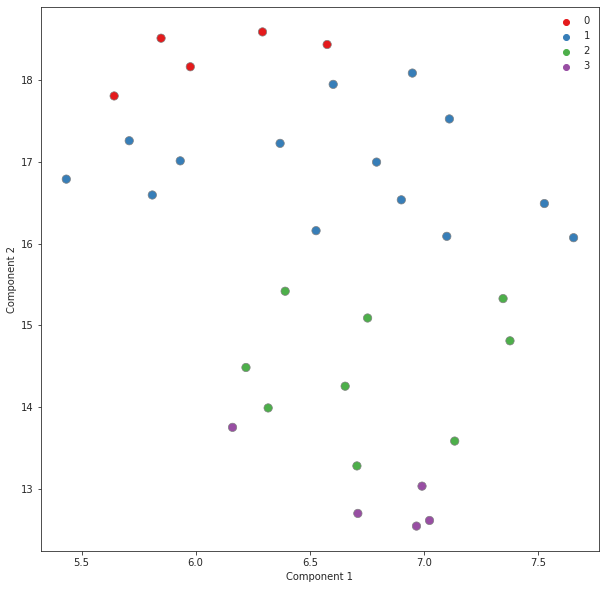

In [14]:
baseline_patients = metadata[(metadata['Week']=='0') & (metadata['omalizumab responder status']=='Responder')].index
data = counts.loc[goi, baseline_patients].T 

frame = pd.DataFrame(data)
num_cluster = 4

clustering = AgglomerativeClustering(n_clusters = num_cluster).fit(data)
labels = clustering.labels_
frame['labels'] = labels

df_pca = get_umap(frame)
plot_reduction(df_pca)

metadata.loc[baseline_patients,'clusters'] = ['R-before-'+str(label) for label in labels]
patient_to_cluster_map = dict(list(zip([pat.split('W')[0] for pat in patients], labels)))


In [15]:
print(metadata['clusters'].value_counts() ) 

R-before-1     14
R-before-2      9
NR-before-0     6
R-before-3      5
R-before-0      5
NR-before-1     5
Name: clusters, dtype: int64


In [16]:
meta_subset = metadata
meta_subset.loc[meta_subset['Status']=='Healthy','clusters'] = 'H'
meta_subset['clusters'].value_counts()

for clus in meta_subset['clusters'].value_counts().keys():
    if clus != 'H':
        pats =  meta_subset[meta_subset['clusters']==clus].index.values
        after_pats = [pat.split('W')[0]+'W26' for pat in pats]
        meta_subset.loc[after_pats, 'clusters'] = clus.replace('before', 'after')

print(meta_subset['clusters'].value_counts() ) 

## Save metadata of Week-1 and Week26 patients for DE analysis
meta_subset = meta_subset[meta_subset['clusters'].notna()]# metadata[metadata['Week'].isin(['-1','26',None])]
meta_subset.to_csv('Data/meta.tsv', sep='\t')

## Save counts of Week-1 and Week26 patients for DE analysis
counts[meta_subset.index].to_csv('Data/counts.tsv',sep='\t')

## Save annotations
annot = pd.read_csv('GSE134544_annotations.tsv',sep='\t', comment ='#').set_index(['ID'])
annot = annot.loc[counts.index]
annot_subset = annot[['ILMN_Gene','Source']].dropna()
annot_subset.columns = ['ILMN_Gene','Source']
annot_subset.to_csv('Data/annot.tsv', sep='\t')

H              17
R-before-1     14
R-after-1      14
R-before-2      9
R-after-2       9
NR-before-0     6
NR-after-0      6
R-before-3      5
R-after-3       5
R-before-0      5
R-after-0       5
NR-before-1     5
NR-after-1      5
Name: clusters, dtype: int64


### Welsch T-test

In [17]:
def DE_cluster(df_expression, meta, annot, patient_ids = False, group1 = None, group2 = False, grp_type=False, rest = False, genes_of_interest = False):
    '''
    genes_of_interest = genes to be analyzed
    '''
    
    if group1 is not None:
        print('Group1:', group1)
        patients_group1 = df_expression[meta[(meta[grp_type] == group1)].index]
        print('#Patients in Group1:', patients_group1.shape[1])
        print(patients_group1.columns)
    elif len(patient_ids) > 0:
        print('Group1:', group1)
        patients_group1 = df_expression[patient_ids]
        print('#Patients in Group1:', patients_group1.shape[1])
        print(patients_group1.columns)
        

    patients_group2 = df_expression[meta[(meta['Status'] == 'Healthy')].index]

    ########################################################
    ################## Perform t-test ######################
    ########################################################
    pvals = []
    log2fc = {}
    
    for gene in genes_of_interest:
        pval = stats.ttest_ind(patients_group1.loc[gene], patients_group2.loc[gene])
        pvals.append(pval.pvalue)
        log2fc[gene] = np.log2(patients_group1.loc[gene].mean()) - np.log2(patients_group2.loc[gene].mean())  

    pvals = np.array(pvals)
    pvals[np.isnan(pvals)] = 0

    padj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh')
    reject = padj[0]
    pcorr = padj[1]
    wanted_keys = genes_of_interest[reject]
    
    output = pd.DataFrame(annot.loc[wanted_keys])#.copy()
    output['adj.P.Val'] = np.array(padj[1][reject])
    output['P.Value'] = np.array(pvals[reject])
    output['logFC'] = [log2fc[k] for k in wanted_keys]

    all_de  = dict((k, log2fc[k]) for k in wanted_keys if k in log2fc) 
    up_reg  = [k for k,v in all_de.items() if float(v) >= 0] 
    down_reg = [k for k,v in all_de.items() if float(v) < 0] 
    log2fc_up = {annot.loc[k]: log2fc[k] for k in up_reg}
    log2fc_down = {annot.loc[k]: log2fc[k] for k in down_reg}
    
    upreg = output.loc[up_reg]
    downreg = output.loc[down_reg]
    
    return annot.loc[up_reg].values, annot.loc[down_reg].values, upreg, downreg


## Non-Responders

In [18]:
annot = pd.read_csv('GSE134544_annotations.tsv',sep='\t', comment ='#').set_index(['ID'])

clus = metadata.loc[metadata['omalizumab responder status'] == 'Non-responder', 'clusters'].value_counts().index
for i in clus:
    cluster = i
    up_reg, down_reg, upreg, downreg = DE_cluster(df_expression = counts,
                                                 meta = metadata, 
                                                 annot = annot['ILMN_Gene'],
                                                 group1 =  cluster,
                                                 grp_type = 'clusters', 
                                                 genes_of_interest = counts.index) #np.array(list(set(annot[annot['ILMN_Gene'].isin(genes_all)].index) & set(counts.index))) )
    #print( upreg[upreg.ILMN_Gene.isin(genes_all)].index.values ) 
    print( upreg[(upreg['P.Value']!=0) & (upreg.ILMN_Gene.isin(genes_all))]) #upreg[upreg.ILMN_Gene.isin(genes_all)]  ) 
    print( upreg[(upreg['P.Value']!=0) & (upreg.ILMN_Gene.isin(genes_all))].index)
    print('##########################################################')
    
    

Group1: NR-before-0
#Patients in Group1: 6
Index(['X2W0', 'X9W0', 'X12W0', 'X15W0', 'X21W0', 'X50W0'], dtype='object')
             ILMN_Gene  adj.P.Val   P.Value     logFC
ID_REF                                               
ILMN_1652185      IL4R   0.013463  0.000381  0.103783
ILMN_1690921     STAT2   0.029134  0.001097  0.066006
ILMN_1703326     GPR44   0.021095  0.000704  0.343826
ILMN_1711493     PRAM1   0.040912  0.001805  0.090867
ILMN_1730295   SIGLEC8   0.001852  0.000038  0.540935
ILMN_1756455     IL5RA   0.042388  0.001898  0.189075
ILMN_1763837     ANPEP   0.026769  0.000975  0.139460
ILMN_2059549       SYK   0.038628  0.001621  0.054752
ILMN_2089977    FKBP9L   0.028637  0.001069  0.294893
ILMN_2113126    RNASE3   0.040627  0.001778  0.498494
ILMN_2327812     IL5RA   0.015134  0.000445  0.282113
ILMN_2401978     STAT3   0.002148  0.000045  0.088517
Index(['ILMN_1652185', 'ILMN_1690921', 'ILMN_1703326', 'ILMN_1711493',
       'ILMN_1730295', 'ILMN_1756455', 'ILMN_1763837',

## Responders

In [19]:
clus = metadata.loc[metadata['omalizumab responder status'] == 'Responder', 'clusters'].value_counts().index
for i in clus:
    cluster = i
    up_reg, down_reg, upreg, downreg = DE_cluster(df_expression = counts,
                                                 meta = metadata, 
                                                 annot = annot['ILMN_Gene'],
                                                 group1 =  cluster,
                                                 grp_type = 'clusters', 
                                                 genes_of_interest = counts.index) #np.array(list(set(annot[annot['ILMN_Gene'].isin(genes_all)].index) & set(counts.index))) )
    
    
    print(upreg[upreg.ILMN_Gene.isin(genes_all) & (upreg['P.Value']!=0)] )
    print(upreg[upreg.ILMN_Gene.isin(genes_all) & (upreg['P.Value']!=0)].index )

    print('##########################################################')
    

Group1: R-before-1
#Patients in Group1: 14
Index(['X6W0', 'X10W0', 'X14W0', 'X17W0', 'X18W0', 'X22W0', 'X27W0', 'X29W0',
       'X32W0', 'X36W0', 'X38W0', 'X39W0', 'X47W0', 'X48W0'],
      dtype='object')
             ILMN_Gene  adj.P.Val   P.Value     logFC
ID_REF                                               
ILMN_1652185      IL4R   0.030313  0.000643  0.073726
ILMN_1703326     GPR44   0.001710  0.000026  0.350074
ILMN_1715715     CEBPA   0.044550  0.001084  0.060991
ILMN_1730295   SIGLEC8   0.017997  0.000331  0.445069
ILMN_1753547    STAT5A   0.015381  0.000278  0.066560
ILMN_1780601      EMR1   0.018920  0.000350  0.216939
ILMN_2089977    FKBP9L   0.016693  0.000303  0.252011
Index(['ILMN_1652185', 'ILMN_1703326', 'ILMN_1715715', 'ILMN_1730295',
       'ILMN_1753547', 'ILMN_1780601', 'ILMN_2089977'],
      dtype='object', name='ID_REF')
##########################################################
Group1: R-after-1
#Patients in Group1: 14
Index(['X6W26', 'X10W26', 'X14W26', 'X17W26'

In [22]:
NRB0_pats = list(metadata[metadata['clusters']=='NR-before-0'].index.values)
NRB0_genes = ['ILMN_1652185', 'ILMN_1711493', 'ILMN_1730295', 'ILMN_1756455',
       'ILMN_1763837', 'ILMN_2059549', 'ILMN_2089977', 'ILMN_2113126',
       'ILMN_2327812', 'ILMN_2401978']

NRA0_pats = list(metadata[metadata['clusters']=='NR-after-0'].index.values)
NRA0_genes = ['ILMN_2059549', 'ILMN_2089977', 'ILMN_2113126', 'ILMN_2290628',
       'ILMN_2401978']

NRB1_pats = list(metadata[metadata['clusters']=='NR-before-1'].index.values)
NRB1_genes = ['ILMN_1652185', 'ILMN_1663618', 'ILMN_1675939', 'ILMN_1679357',
       'ILMN_1680424', 'ILMN_1681239', 'ILMN_1685009', 'ILMN_1691881',
       'ILMN_1694548', 'ILMN_1711493', 'ILMN_1725661', 'ILMN_1728724',
       'ILMN_1730628', 'ILMN_1730867', 'ILMN_1742601', 'ILMN_1752923',
       'ILMN_1753347', 'ILMN_1758371', 'ILMN_1763837', 'ILMN_1764964',
       'ILMN_1766736', 'ILMN_1767193', 'ILMN_1767360', 'ILMN_1768505',
       'ILMN_1772131', 'ILMN_1774071', 'ILMN_1806056', 'ILMN_1810584',
       'ILMN_2059549', 'ILMN_2089977', 'ILMN_2102721', 'ILMN_2113126',
       'ILMN_2116877', 'ILMN_2165289', 'ILMN_2193213', 'ILMN_2230892',
       'ILMN_2388112', 'ILMN_2401978', 'ILMN_3251610']
    
NRA1_pats = list(metadata[metadata['clusters']=='NR-after-1'].index.values)
NRA1_genes =  ['ILMN_1663618', 'ILMN_1679357', 'ILMN_1680424', 'ILMN_1681239',
       'ILMN_1685009', 'ILMN_1699908', 'ILMN_1725661', 'ILMN_1729314',
       'ILMN_1730628', 'ILMN_1730867', 'ILMN_1753347', 'ILMN_1766736',
       'ILMN_1772131', 'ILMN_1792072', 'ILMN_1806056', 'ILMN_2059549',
       'ILMN_2089977', 'ILMN_2102721', 'ILMN_2113126', 'ILMN_2116877',
       'ILMN_2165289', 'ILMN_2193213', 'ILMN_2401978']

RB0_pats = list(metadata[metadata['clusters']=='R-before-0'].index.values)
RB0_genes = []

RA0_pats = list(metadata[metadata['clusters']=='R-after-0'].index.values)
RA0_genes = ['ILMN_1730295']

RB1_pats = list(metadata[metadata['clusters']=='R-before-1'].index.values)
RB1_genes = ['ILMN_1652185',   'ILMN_1730295',
       'ILMN_1780601', 'ILMN_2089977']

RA1_pats = list(metadata[metadata['clusters']=='R-after-1'].index.values)
RA1_genes = ['ILMN_1652185', 'ILMN_1780601', 'ILMN_2089977']

RB2_pats = list(metadata[metadata['clusters']=='R-before-2'].index.values)
RB2_genes = ['ILMN_1654875', 'ILMN_1679357', 'ILMN_1680424',
        'ILMN_1725661', 'ILMN_1729314', 'ILMN_1730295',
       'ILMN_1730628', 'ILMN_1730867', 'ILMN_1753347', 'ILMN_1780601',
       'ILMN_1806056', 'ILMN_2059549', 'ILMN_2102721', 'ILMN_2113126',
       'ILMN_2116877', 'ILMN_2165289', 'ILMN_2193213', 'ILMN_2327812']

RA2_pats = list(metadata[metadata['clusters']=='R-after-2'].index.values)
RA2_genes = ['ILMN_1679357',  'ILMN_1725661', 'ILMN_1729314',
       'ILMN_1730867', 'ILMN_1753347', 'ILMN_1780601', 'ILMN_2113126',
       'ILMN_2165289', 'ILMN_2193213']

RB3_pats = list(metadata[metadata['clusters']=='R-before-3'].index.values)
RB3_genes = ['ILMN_1663618', 'ILMN_1679357', 'ILMN_1680424', 'ILMN_1681239',
       'ILMN_1685009', 'ILMN_1694548', 'ILMN_1711493', 
       'ILMN_1725661', 'ILMN_1728724', 'ILMN_1729314', 'ILMN_1730628',
       'ILMN_1730867', 'ILMN_1753347', 'ILMN_1753954', 'ILMN_1766736',
       'ILMN_1768505', 'ILMN_1792072', 'ILMN_1806056', 'ILMN_2059549',
       'ILMN_2089977', 'ILMN_2102721', 'ILMN_2113126', 'ILMN_2116877',
       'ILMN_2165289', 'ILMN_2193213', 'ILMN_2401978']

RA3_pats = list(metadata[metadata['clusters']=='R-after-3'].index.values)
RA3_genes = ['ILMN_1663618', 'ILMN_1680424',  'ILMN_1729314',
       'ILMN_1730867', 'ILMN_1753347', 'ILMN_1766736', 'ILMN_2089977',
       'ILMN_2401978']

H_pats = list(metadata[metadata['clusters']=='H'].index.values)

all_genes = list( set(RB0_genes + RA0_genes + RB1_genes + RA1_genes + RB2_genes + RA2_genes + RB3_genes + RA3_genes + NRB0_genes + NRA0_genes + NRB1_genes + NRA1_genes ) ) 
all_pats = H_pats + RB0_pats + RA0_pats + RB1_pats + RA1_pats + RB2_pats + RA2_pats + RB3_pats + RA3_pats + NRB0_pats + NRA0_pats + NRB1_pats + NRA1_pats 

Th17 = ['IL17RA','STAT3', 'STAT3']
Th17_ids = ['ILMN_1728724','ILMN_2401978','ILMN_1663618']
Th1 = ['IFNAR1','IFNGR1','IFNGR2','IL1R1','IL1R2','IL1R2','IL12RB1']#, 'STAT2']
Th1_ids = ['ILMN_1752923', 'ILMN_1675939','ILMN_1764964', 'ILMN_1810584','ILMN_1758371','ILMN_1772131','ILMN_1699908']#, 'ILMN_1690921']
Th2 = ['IL4R','IL4R','IL5RA','IL5RA','IL10RB','IL10RB','IL13RA1']#,'STAT5A','STAT5B']
Th2_ids = ['ILMN_1652185','ILMN_1691881','ILMN_1756455','ILMN_2327812','ILMN_2230892','ILMN_1767360','ILMN_1768505']#,'ILMN_1753547','ILMN_1684034']

Eosinophil = ['ANPEP','CLC', 'CR1','CR1','CR1', 'EMR1','PRG2','RNASE2','RNASE3','SIGLEC8']
Eosinophil_ids = ['ILMN_1763837','ILMN_1654875','ILMN_1767193','ILMN_2388112','ILMN_1742601','ILMN_1780601','ILMN_1729314','ILMN_1730628','ILMN_2113126','ILMN_1730295']
Neutrophil = ['ANXA3','AZU1','BPI', 'CEACAM8','CD177','CD177', 'CTSG', 'DEFA1','DEFA1B', 'DEFA1B', 'DEFA1B', 'DEFA3','DEFA4','FKBP9L','FUT4','IL16','ITGAM',  
              'MYO1F', 'OLFM4','OLFM4', 'PRAM1', 'SYK']
Neutrophil_ids = ['ILMN_1694548','ILMN_1730867', 'ILMN_1766736', 'ILMN_1806056',
                 'ILMN_3251610','ILMN_1774071','ILMN_1680424', 'ILMN_2193213'  ,  'ILMN_1725661','ILMN_2102721', 'ILMN_1679357','ILMN_2165289','ILMN_1753347','ILMN_2089977',
                 'ILMN_1792072', 'ILMN_2290628','ILMN_1685009', 
                'ILMN_1681239','ILMN_1753954','ILMN_2116877', 'ILMN_1711493','ILMN_2059549']

all_gene_ids = Th2_ids + Th17_ids + Th1_ids +  Eosinophil_ids + Neutrophil_ids

print(len(all_genes), len(all_gene_ids))
annot.loc[all_gene_ids]['ILMN_Gene'].values

49 49


array(['IL4R', 'IL4R', 'IL5RA', 'IL5RA', 'IL10RB', 'IL10RB', 'IL13RA1',
       'IL17RA', 'STAT3', 'STAT3', 'IFNAR1', 'IFNGR1', 'IFNGR2', 'IL1R1',
       'IL1R2', 'IL1R2', 'IL12RB1', 'ANPEP', 'CLC', 'CR1', 'CR1', 'CR1',
       'EMR1', 'PRG2', 'RNASE2', 'RNASE3', 'SIGLEC8', 'ANXA3', 'AZU1',
       'BPI', 'CEACAM8', 'CD177', 'CD177', 'CTSG', 'DEFA1', 'DEFA1B',
       'DEFA1B', 'DEFA1B', 'DEFA3', 'DEFA4', 'FKBP9L', 'FUT4', 'IL16',
       'ITGAM', 'MYO1F', 'OLFM4', 'OLFM4', 'PRAM1', 'SYK'], dtype=object)

(49, 13)


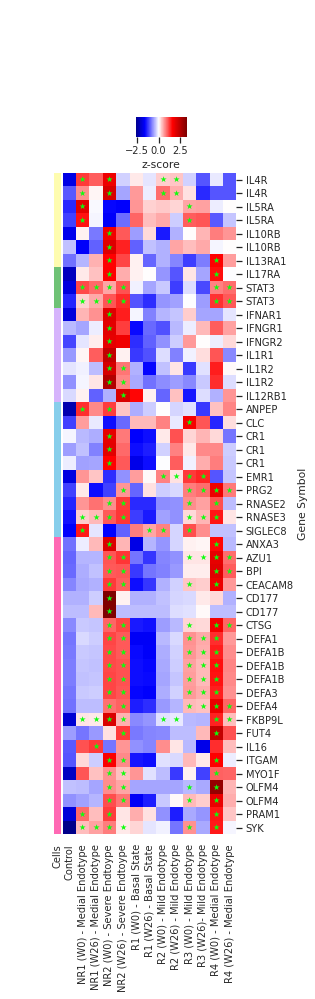

In [53]:
df = pd.DataFrame()
df['Healthy Control'] = counts[H_pats].mean(axis=1)

df['Non-responder Cluster 1 (W0)'] = counts[NRB0_pats].mean(axis=1)
df['Non-responder Cluster 1 (W26)'] = counts[NRA0_pats].mean(axis=1)
df['Non-responder Cluster 2 (W0)'] = counts[NRB1_pats].mean(axis=1)
df['Non-responder Cluster 2 (W26)'] = counts[NRA1_pats].mean(axis=1)

df['Responder Cluster 1 (W0)'] = counts[RB0_pats].mean(axis=1)
df['Responder Cluster 1 (W26)'] = counts[RA0_pats].mean(axis=1)
df['Responder Cluster 2 (W0)'] = counts[RB1_pats].mean(axis=1)
df['Responder Cluster 2 (W26)'] = counts[RA1_pats].mean(axis=1)
df['Responder Cluster 3 (W0)'] = counts[RB2_pats].mean(axis=1)
df['Responder Cluster 3 (W26)'] = counts[RA2_pats].mean(axis=1)
df['Responder Cluster 4 (W0)'] = counts[RB3_pats].mean(axis=1)
df['Responder Cluster 4 (W26)'] = counts[RA3_pats].mean(axis=1)

cols = df.columns
rows = df.index
df_trans_zscore = pd.DataFrame(zscore(df, axis=1))
df_trans_zscore.columns = cols
df_trans_zscore.index = rows


gene_ids = list(set(annot[annot.ILMN_Gene.isin(genes_all)].index) & set(counts.index))
df = df.loc[all_gene_ids] #df_trans_zscore.loc[all_gene_ids]
df['Gene Symbol'] = annot[annot.index.isin(df.index)]['ILMN_Gene']
df = df.set_index(['Gene Symbol'])
print(df.shape)

df_colors = pd.DataFrame(columns = ['ID','Gene Symbol', 'Cells'])
df_colors['ID'] = annot.loc[all_gene_ids].index
df_colors['Gene Symbol'] = annot.loc[all_gene_ids]['ILMN_Gene'].values

df_colors['Cells'] = ['Th2'] * len(Th2_ids) + ['Th17'] * len(Th17_ids) + ['Th1'] * len(Th1_ids) + ['Eosinophil'] * len(Eosinophil_ids) + ['Neutrophil'] * len(Neutrophil_ids)

df_colors = df_colors.set_index(['Gene Symbol'])
colors = {'Th2':'#fefcaf',#'#fffd74',#'lightcoral',#'crimson',
             'Th17':'#6fc276', #'#9be5aa',#'#51b73b', #'mediumaquamarine',#'chartreuse',#'lightgreen',
              'Th1':'#d6b4fc',#'mediumslateblue',
          'Basophil':'#b26400',#'#89a0b0',
              'Eosinophil':'skyblue',
             'Neutrophil':'hotpink'}

rcolors = df_colors['Cells'].map(colors)

## labels
labels = pd.DataFrame(df)
labels[labels < 20] = ''#np.NaN

import matplotlib
lab = r'$\bigstar$'

labels.loc[ annot.loc[NRB0_genes,'ILMN_Gene'] ,'Non-responder Cluster 1 (W0)'] = lab
labels.loc[ annot.loc[NRA0_genes,'ILMN_Gene'] ,'Non-responder Cluster 1 (W26)'] = lab

labels.loc[ annot.loc[NRB1_genes,'ILMN_Gene'] ,'Non-responder Cluster 2 (W0)'] = lab
labels.loc[ annot.loc[NRA1_genes,'ILMN_Gene'] ,'Non-responder Cluster 2 (W26)'] = lab

labels.loc[ annot.loc[RB0_genes,'ILMN_Gene'] ,'Responder Cluster 1 (W0)'] = lab
labels.loc[ annot.loc[RA0_genes,'ILMN_Gene'] ,'Responder Cluster 1 (W26)'] = lab

labels.loc[ annot.loc[RB1_genes,'ILMN_Gene'] ,'Responder Cluster 2 (W0)'] =  lab
labels.loc[ annot.loc[RA1_genes,'ILMN_Gene'] ,'Responder Cluster 2 (W26)'] = lab

labels.loc[ annot.loc[RB2_genes,'ILMN_Gene'] ,'Responder Cluster 3 (W0)'] = lab
labels.loc[ annot.loc[RA2_genes,'ILMN_Gene'] ,'Responder Cluster 3 (W26)'] = lab

labels.loc[ annot.loc[RB3_genes,'ILMN_Gene'] ,'Responder Cluster 4 (W0)'] = lab
labels.loc[ annot.loc[RA3_genes,'ILMN_Gene'] ,'Responder Cluster 4 (W26)'] = lab

df.columns = ['Control', 
              'NR1 (W0) - Medial Endotype', 'NR1 (W26) - Medial Endotype', 
              'NR2 (W0) - Severe Endtoype', 'NR2 (W26) - Severe Endtoype', 
              'R1 (W0) - Basal State', 'R1 (W26) - Basal State', 
              'R2 (W0) - Mild Endotype', 'R2 (W26) - Mild Endotype',
              'R3 (W0) - Mild Endotype', 'R3 (W26)- Mild Endotype', ### Normal level of neutrophils
              'R4 (W0) - Medial Endotype', 'R4 (W26) - Medial Endotype']

annot_kws={'fontsize':8, 
           'color':'#0cff0c',
            'weight': 'bold',
          }
 


sns.set(font_scale = 0.9)
res = sns.clustermap(df,
                    figsize = (4.5,14),
                    row_cluster = False,
                    col_cluster = False,
                     annot = np.array(labels.values), 
                     fmt = '', annot_kws= annot_kws,
                    cmap = 'seismic',
                     row_colors = rcolors,
                     center = 0,
                     z_score = 0,
                     cbar_pos = (.432, .86, .158, .019),  
                     cbar_kws = {'label':'z-score' ,'orientation':'horizontal',"shrink": 1.1},
                   )


plt.savefig('heatmap_cluster.pdf',  bbox_inches='tight')
